# Ford GoBike System Data Deep Dive
## by Isaac Aboagye Ampem

## Investigation Overview


> Here, I wanted to investigate the distribution of bikers' gender and their trip duration. I also wanted to deep dive on the correlation between age of bikers and trip duration as well as correlation between age of bikers, trip duration and the period of day.


## Dataset Overview

> The data consists of information on 174952 trips across the San Francesco Bay by bikers in the month of February 2019. The information in the dataset insclude, start and endtimes, gender of biker, birth year of biker, start and end coordinates, start and end station IDs, bike ID, duration of trips, whether or not a trip utilized bike-share through out or not age of bikers, start and end hours, period of day, day of week and distance covered in kilometers. 

> The dataset, there were bikers above 70 years to a max of 141 (outliers). Since in reality it is near infeasible for such aged persons to ride bicycle's the dataset was filtered to capture only bikers 70 years old and less. The final dataset for the visualization containded information on 174377 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# read dataset 
biking_data = pd.read_csv('clean_bikeshare_data.csv')
# create subset datatset for bikers 70 years and less. i.e. removing outliers
df_new = biking_data[biking_data.age <= 70]

## Visualization 1: Pie Chart of Gender of Bikers

>This is a pie chart showing the gender of all the bikers in the bike-sharing system covering the greater San Francisco Bay area. From the chart, there are three gender categories; male, female and other which represent other bikers who didnot declared their gender or identify neither as a male or female. The chart reveales that the majority of bikers were males (74.6 %), followed by females (23.4 %) and other (2.1 %).

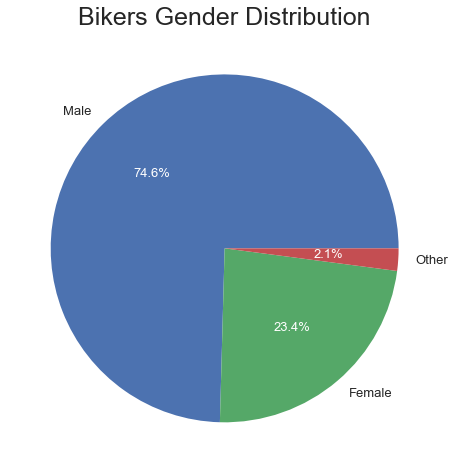

In [3]:
# compute counts of bikers per gender
gender_counts = df_new['member_gender'].value_counts()
# set figure size
plt.figure(figsize=(14,8))
#set style to use
style.use('seaborn')
# plot pie chart of gender of bikers
_,_, plot = plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%', textprops={'fontsize':13}) # add wedgeprops = {'width' : 0.4} to get a doughnut plot
# set text color 
for text in plot:
    text.set_color('white')
# set chart title
plt.title('Bikers Gender Distribution', fontsize=25);

## Visualization 2: Distibution of Bike Trip Durations

> This is a histogram showing the distribution of durations of bike trips for all bikers under the age of 70. Here it is revealed that majority of bikers complete their trips in 2000 seconds or less. i.e. approxiamate 33 mins or less.

In [4]:
def my_hist (data, hor, ver, x1, x2, y1, y2, x_label, y_label, title):
    # FIND BIN SIZE MATHEMATICALLY
    # find 3rd and 1st quartile
    q3, q1 = np.percentile(data, [75, 25])
    # compute interquartile range
    IQR = q3 - q1
    # compute bin size from the formular 2*IQR*(n^(-1/3)) where n is number of data entries
    binsize = 2* IQR * ((data.nunique())**(-1/3))
    print('Binsize = ' + str(round(binsize, 0)))
    # compute bins from
    bins = np.arange(0, data.max()+binsize, binsize)
    # set fig size
    plt.figure(figsize=(hor, ver))
    # plot histogram
    sns.histplot(x=data, bins= len(bins))
    # set x-axis label
    plt.xlabel(x_label, fontsize=15)
    # set y-axis label
    plt.ylabel(y_label, fontsize=15)
    # set chart title
    plt.title(title, fontsize=25)
    # plot axis
    plt.axis([x1,x2,y1,y2])
    # trim x-axis by setting limits
    plt.xlim(0,3500)
    # show plot
    plt.show()

Binsize = 57.0


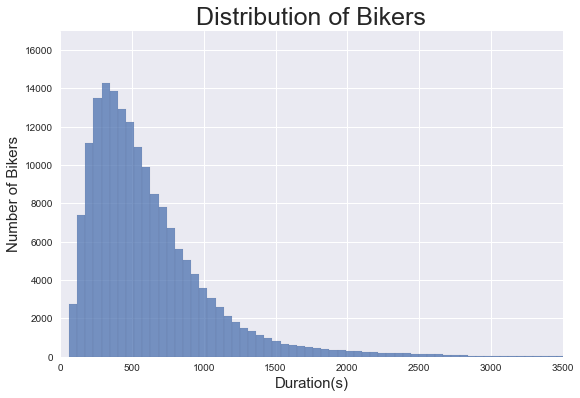

In [5]:
# call function to plot histogram of trip durations
my_hist(df_new['duration_sec'], 9, 6, -200, 6000, 0, 17000, 'Duration(s)', 'Number of Bikers', 'Distribution of Bikers')

## Visualization 3: Correlation Plot of Age and Trip Duration

> This visualization tries to assess the correlation between the bikers age and duration of trips they make. From plot one (left), little could be deduced about the relations beteen the two named variables. However, plot 2 (right) reveals that there is medium to strong correlation between bikers 50 years and less who complete their trips approximately 17 minutes or less but barely no correlation between age and durations for the other bikers completing their trips beyond approximately 17 mins.



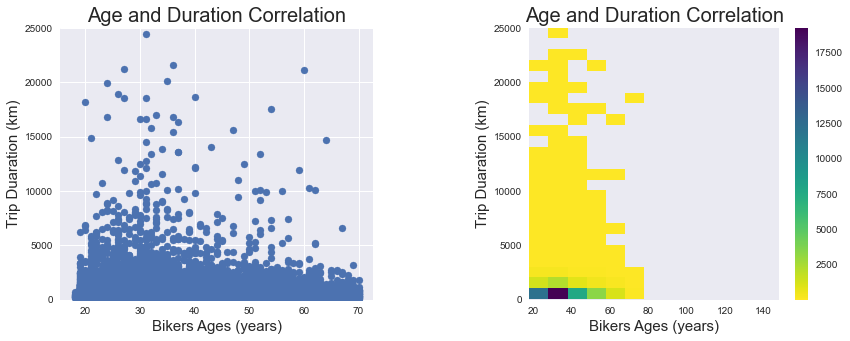

In [6]:
plt.figure(figsize=(14,5))
# set horizontal spacing between subplots
plt.subplots_adjust(wspace=0.5)
# choose style to use
style.use('seaborn')
# set location of firt plot
plt.subplot(1,2,1)
# plot scatter plot between age and trip duration
plt.scatter(df_new['age'].sample(50000),df_new['duration_sec'].sample(50000))
# set chart title
plt.title('Age and Duration Correlation', fontsize=20)
# set y-axis limits
plt.ylim(0, 25000)
# set x-axis label
plt.xlabel('Bikers Ages (years)', fontsize=15)
# set y-axis label
plt.ylabel('Trip Duaration (km)', fontsize=15)


# set location of second plot
plt.subplot(1,2,2)
# define number of bins for x and y planes
x_bins = np.arange(18,141+10,10)
y_bins = np.arange(61, 84548 + 1000, 1000)
# plot histogram of feature of interest
plt.hist2d(data = df_new.sample(50000),x= 'age', y= 'duration_sec', cmin=0.5, cmap= 'viridis_r',
          bins = [x_bins, y_bins])
# set chart title
plt.title('Age and Duration Correlation', fontsize=20)
# trim y axis limitsbeyond 17
plt.ylim(0, 25000)
# set x-axis label
plt.xlabel('Bikers Ages (years)', fontsize=15)
# set y-axis label
plt.ylabel('Trip Duaration (km)', fontsize=15)
# plot color bar
plt.colorbar();

## Visualization 4: Grid Plot of Age,  Time of Day and Distance Covered
> This is a grid plot of three variables; time of day, age of bikers and distance covered in kilometers.
The chart reveals that most distance is covered between morning and evening. Here it is revealed that bikers above 65 avoid starting their trips in the late evening, dawn and midnight periods of the day.

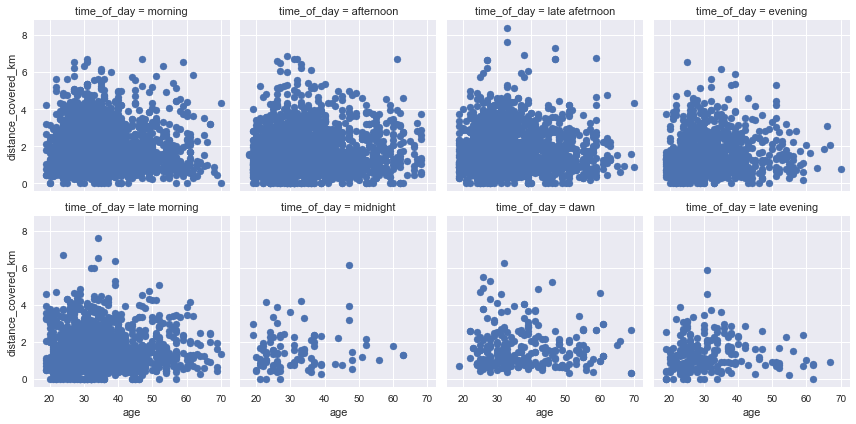

In [7]:
# define number of bins
bins = np.arange(12, 58+2, 2)
# creat facet grid of two variables and assign to obeject g
g = sns.FacetGrid(data = df_new.sample(10000), col='time_of_day', col_wrap=4, margin_titles=True)
# plot scatter plot of age and distance and map to g
g.map(plt.scatter, 'age', 'distance_covered_km');